# Pre-processing

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/dataset.csv')

df.head()

,Unnamed: 0,Page,Category,Links,Text
0,0,Field trip,Education,['American Association of School Administrator...,['A field trip or excursion is a journey by a ...
1,1,Education in emergencies and conflict areas,Education,"['Adult', 'Armed conflict', 'Asylum seeker', '...","[""Education in emergencies and conflict areas ..."
2,2,Ability grouping,Education,"['Academic achievement', 'Classroom', 'Cluster...",['Ability grouping is the educational practice...
3,3,Classwide Peer Tutoring,Education,"['ADHD', 'Active learning', 'Cardio-pulmonary ...",['Classwide Peer Tutoring (CWPT) is a variatio...
4,5,Flexible learning,Education,"['Australia', 'Blended learning', 'Distance ed...",['Flexible learning is a principle of practice...


# Creating classifier

In [3]:
# Creating lexicon
nltk.download('vader_lexicon')

# Sentiment Analysis function
vader = SentimentIntensityAnalyzer()

# Example
vader.polarity_scores('the battery is ok, but the screen is terrible')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.325, 'neu': 0.549, 'pos': 0.125, 'compound': -0.5499}

# Applying weak-labeling

In [4]:
# Getting compound score for each text

scores = []
for e in df['Text']:
    cp = vader.polarity_scores(e)
    scores.append(cp['compound'])

df['Score'] = scores

df.head()

,Unnamed: 0,Page,Category,Links,Text,Score
0,0,Field trip,Education,['American Association of School Administrator...,['A field trip or excursion is a journey by a ...,0.9837
1,1,Education in emergencies and conflict areas,Education,"['Adult', 'Armed conflict', 'Asylum seeker', '...","[""Education in emergencies and conflict areas ...",-0.9356
2,2,Ability grouping,Education,"['Academic achievement', 'Classroom', 'Cluster...",['Ability grouping is the educational practice...,0.9931
3,3,Classwide Peer Tutoring,Education,"['ADHD', 'Active learning', 'Cardio-pulmonary ...",['Classwide Peer Tutoring (CWPT) is a variatio...,0.9960
4,5,Flexible learning,Education,"['Australia', 'Blended learning', 'Distance ed...",['Flexible learning is a principle of practice...,0.7579


Text(0.5, 1.0, 'Sentiment score')

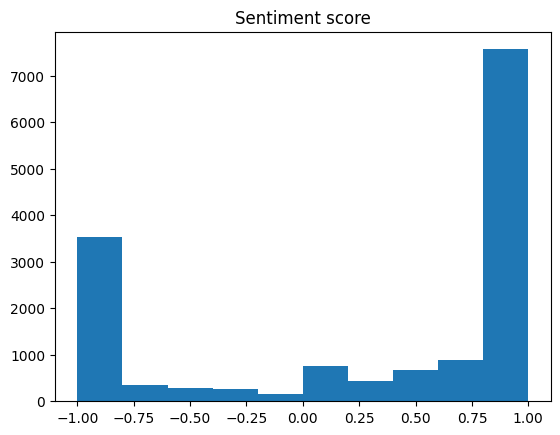

In [5]:
# Plotting scores
plt.hist(df['Score'])
plt.title('Sentiment score')

In [6]:
df.to_csv('./data/dataset_sentiment.csv')